                  Avg. Area House Age  Avg. Area Number of Rooms  \
Avg. Area Income                                                   
79545.458574                 5.682861                   7.009188   
79248.642455                 6.002900                   6.730821   
61287.067179                 5.865890                   8.512727   
63345.240046                 7.188236                   5.586729   
59982.197226                 5.040555                   7.839388   

                  Avg. Area Number of Bedrooms  Area Population         Price  \
Avg. Area Income                                                                
79545.458574                              4.09     23086.800503  1.059034e+06   
79248.642455                              3.09     40173.072174  1.505891e+06   
61287.067179                              5.13     36882.159400  1.058988e+06   
63345.240046                              3.26     34310.242831  1.260617e+06   
59982.197226                         

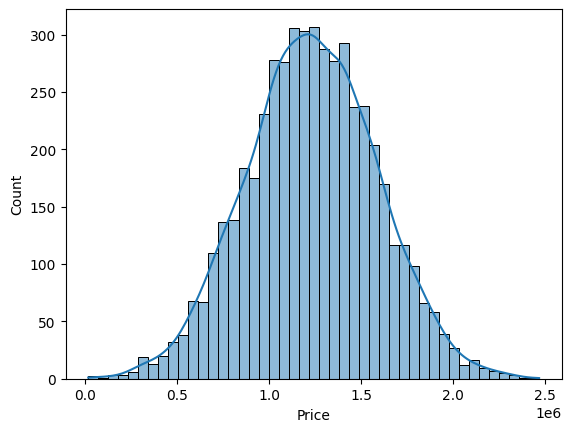

Intercept (b0): -1118638.0020783949
                                Coefficient
Avg. Area House Age           165614.431762
Avg. Area Number of Rooms     116980.674777
Avg. Area Number of Bedrooms    2299.718489
Area Population                   14.713592


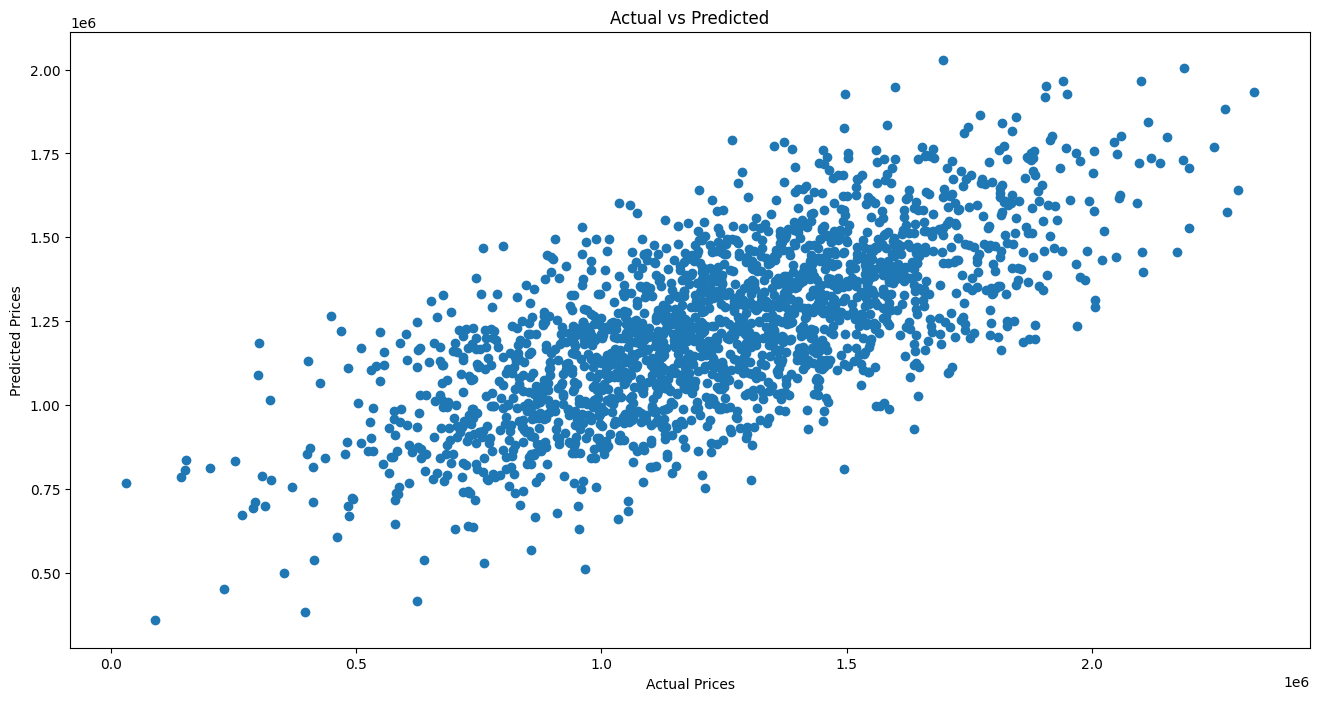

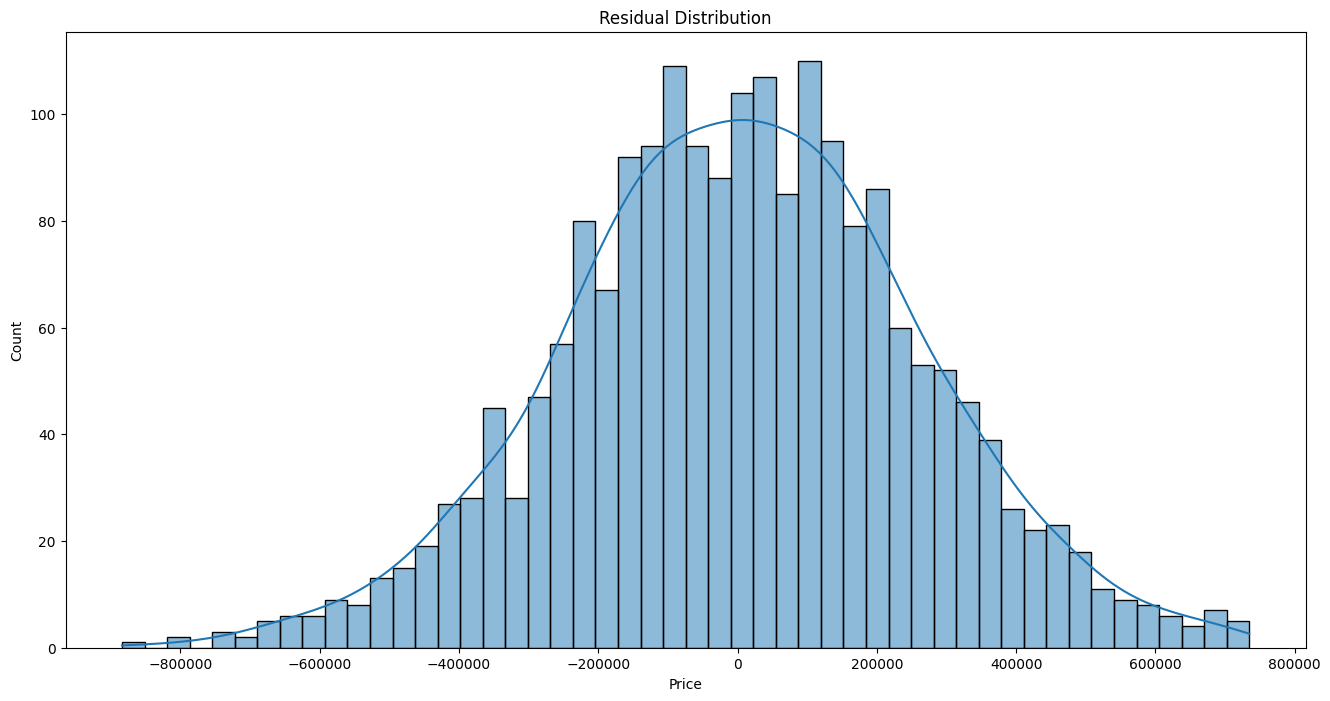

MAE: 202189.43869513064
MSE: 64936834445.326706
RMSE: 254827.06772500975


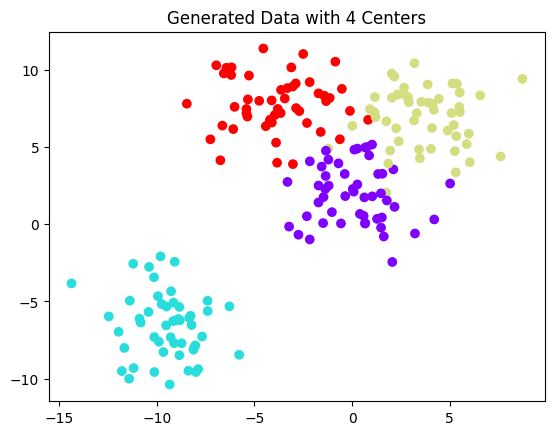

Cluster Centers:
 [[-0.03183854  2.07689723]
 [-4.13591321  7.95389851]
 [ 3.66465568  6.97762652]
 [-9.46941837 -6.56081545]]
Labels:
 [1 2 0 2 2 3 2 0 2 0 1 0 2 2 1 0 2 0 3 1 3 0 0 3 1 3 3 0 2 2 1 3 2 0 0 1 3
 3 3 0 3 1 1 1 0 2 1 0 3 0 0 1 2 0 3 1 0 0 1 2 3 2 3 1 2 0 3 2 2 3 2 0 3 0
 3 2 2 0 1 0 0 3 2 3 0 0 0 1 0 3 3 3 3 0 0 3 2 1 3 2 0 3 0 0 2 0 3 2 3 3 2
 1 1 2 3 2 1 1 2 1 2 1 0 1 0 2 1 0 3 1 1 1 0 3 3 1 2 1 2 0 3 2 3 1 1 2 0 3
 1 1 1 1 0 2 0 1 2 2 2 0 2 0 0 1 3 1 0 2 1 0 2 0 1 2 0 1 2 2 3 2 1 3 3 1 3
 3 3 3 3 0 3 2 2 1 3 0 2 2 3 0]


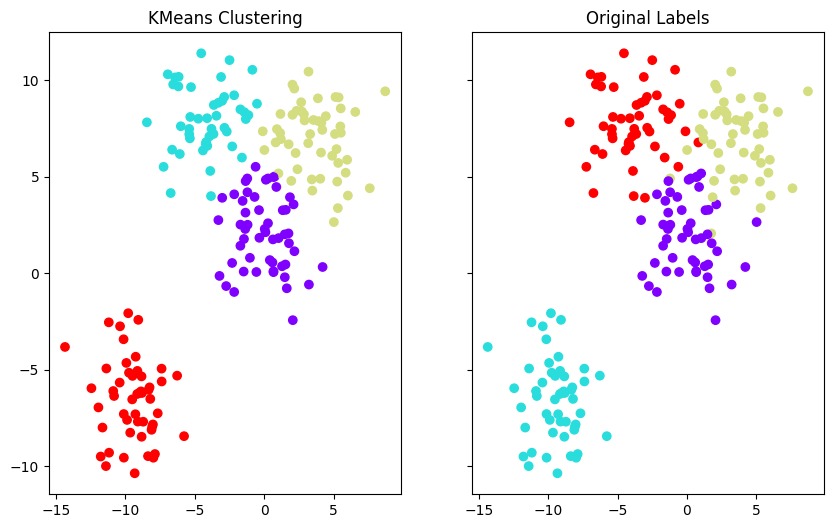

In [ ]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Read CSV file (make sure USA_Housing.csv is in the same folder)
df = pd.read_csv('USA_Housing.csv', index_col=0)#first column as row index

# Display data
print(df.head())
print(df.info())
print(df.describe())

# Visualize distribution of target variable
sns.histplot(df['Price'], kde=True)  # replaced distplot (deprecated)
plt.show()

# Features and target
X = df[['Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Intercept & coefficients
print("Intercept (b0):", lm.intercept_)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(cdf)

# Predictions
predictions = lm.predict(X_test)

# Scatter plot of actual vs predicted
plt.figure(figsize=(16, 8))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

# Residuals
plt.figure(figsize=(16, 8))
sns.histplot((y_test - predictions), bins=50, kde=True)
plt.title("Residual Distribution")
plt.show()

# Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# -----------------------
# K-Means Clustering Example
# -----------------------
from sklearn.datasets import make_blobs #clusters of somethings is blobs(binary datas)
from sklearn.cluster import KMeans

# Generate synthetic clustering data
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

# Scatter plot of generated data
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')
plt.title("Generated Data with 4 Centers")
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=101)
kmeans.fit(data[0])

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Labels:\n", kmeans.labels_)

# Compare KMeans vs Original
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

ax1.set_title('KMeans Clustering')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title("Original Labels")
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

plt.show()
